# Band index calculation <img align="right" src="image/gistda.png" width="200" height="200">
 - [Set parameters for load data](#Set-parameters-for-load-data)
 - [Explore image](#Explore-image)
 - [Index calculation](#Index-calculation)
 - [Select time step](#Select-time-step)
 - [Plot result](#Plot-result)
 
<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.org/github/Pathakorn40/rice-detection/blob/main/Tutorial/Band_indices.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

In index that we can calculate comprise of NDVI, GNDVI, LAI, RVI, SR, SAVI, MSAVI, NDWI, WI, DVI, EVI,and BAI.

### Import package

In [1]:
%matplotlib inline

from pystac_client import Client
from odc.stac import configure_rio, stac_load
from dask.distributed import Client as DaskClient
import matplotlib.pyplot as plt
from dream_river.indices import cal_index
from dream_river.plotimg import rgb

client = DaskClient()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:39605/status,
Dashboard: http://127.0.0.1:39605/status,Workers: 4
Total threads: 8,Total memory: 39.15 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33483,Workers: 4
Dashboard: http://127.0.0.1:39605/status,Total threads: 8
Started: Just now,Total memory: 39.15 GiB
Comm: tcp://127.0.0.1:36513,Total threads: 2
Dashboard: http://127.0.0.1:37111/status,Memory: 9.79 GiB
Nanny: tcp://127.0.0.1:36603,


In [31]:
#set collection configuration
bbox = [100.5, 13.60, 100.70, 13.80]
start_date = "2020-08-20"
end_date = "2020-08-30"
collections = ["LANDSAT8_SR_C2L2"]
config = {
    "LANDSAT8_SR_C2L2": {
        "assets": {
            "*": {
                "data_type": "uint16",
                "nodata": 0,
                "unit": "unitless",
            },
            "aerosol_qa": {
                "data_type": "uint8",
                "nodata": 0,
                "unit": "bit",
            },
            "pixel_qa": {
                "data_type": "uint16",
                "nodata": 0,
                "unit": "bit",
            },
            "radsat_qa": {
                "data_type": "uint16",
                "units": "bit",
                "nodata": 0,
            },
        },
    }
}

In [32]:
# connect to the GISTDA ODC STAC Catalog
catalog = Client.open(url="http://110.78.252.138/stac")
query = catalog.search(
    bbox=bbox, collections=collections, datetime=f"{start_date}/{end_date}"
)
items = list(query.items())
print(f"Found: {len(items):d} datasets")
for ds in items:
    print(ds.to_dict()['properties']['title'])

Found: 2 datasets
LC08_L2SR_129050_20200829_20200906_02_T1
LC08_L2SR_129051_20200829_20200906_02_T1


### Set parameters to load data

In [33]:
# Loading data using stac_load()

ds = stac_load(
    items,
    bands=['blue','green','red',"nir"],
    stac_cfg=config,
    chunks={'time':2, 'x':200, 'y':200},
    groupby="solar_day",
    bbox=bbox,
)
ds

<xarray.Dataset> Size: 4MB
Dimensions:      (y: 743, x: 727, time: 1)
Coordinates:
  * y            (y) float64 6kB 1.526e+06 1.526e+06 ... 1.504e+06 1.504e+06
  * x            (x) float64 6kB 6.621e+05 6.622e+05 ... 6.839e+05 6.839e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 8B 2020-08-29T03:37:54
Data variables:
    blue         (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    green        (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    red          (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    nir          (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>

### Explore image

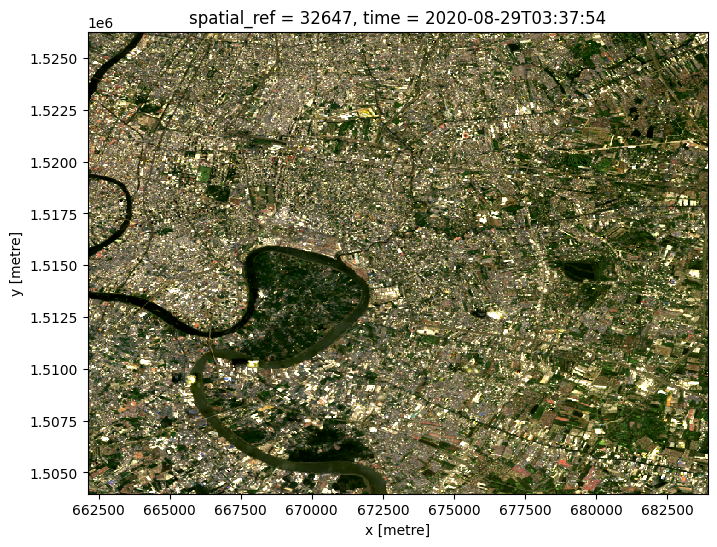

In [35]:
# Plot as an RGB image select first timestep 
rgb(ds, bands=['red','green', 'blue'], index=[0])

### Index calculation
In this case, We will calculate the vegetation index that compose of DVI, NDVI, SR, SAVI, LAI, EVI, respectively.

You can select indinces by you own.

### Load index for the dataset

In [36]:
# Calculate multiple indices and drop original bands
ds_index = cal_index(ds, 
                    index=['DVI','NDVI', 'SR', 'SAVI', 'LAI','EVI'],  
                    collection='ls8_collections_sr_scene')
# explore data
ds_index

<xarray.Dataset> Size: 30MB
Dimensions:      (y: 743, x: 727, time: 1)
Coordinates:
  * y            (y) float64 6kB 1.526e+06 1.526e+06 ... 1.504e+06 1.504e+06
  * x            (x) float64 6kB 6.621e+05 6.622e+05 ... 6.839e+05 6.839e+05
    spatial_ref  int32 4B 32647
  * time         (time) datetime64[ns] 8B 2020-08-29T03:37:54
Data variables:
    blue         (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    green        (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    red          (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    nir          (time, y, x) uint16 1MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    DVI          (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    NDVI         (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SR           (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    SAVI         (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    LAI          (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    EVI          (time, y, x) float64 4MB dask.array<chunksize=(1, 200, 200), meta=np.ndarray>

### Select time step 

select time step to plot image.

In [37]:
# select time step 1 that time = 0 ([0,1,2,...])
ds_time = ds_index.isel(time = 0)

# explore data
ds_time

<xarray.Dataset> Size: 30MB
Dimensions:      (y: 743, x: 727)
Coordinates:
  * y            (y) float64 6kB 1.526e+06 1.526e+06 ... 1.504e+06 1.504e+06
  * x            (x) float64 6kB 6.621e+05 6.622e+05 ... 6.839e+05 6.839e+05
    spatial_ref  int32 4B 32647
    time         datetime64[ns] 8B 2020-08-29T03:37:54
Data variables:
    blue         (y, x) uint16 1MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    green        (y, x) uint16 1MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    red          (y, x) uint16 1MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    nir          (y, x) uint16 1MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    DVI          (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    NDVI         (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    SR           (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    SAVI         (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    LAI          (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>
    EVI          (y, x) float64 4MB dask.array<chunksize=(200, 200), meta=np.ndarray>

As the result abrove, There are data variables of each index that you select on input.

### Plot index result

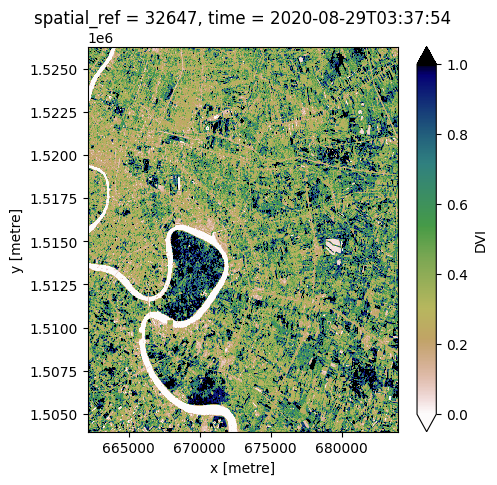

In [38]:
# Plot the results to inspect
# select DVI index
ds_time.DVI.plot(vmin=0, vmax=1, cmap='gist_earth_r', figsize=(5, 5))

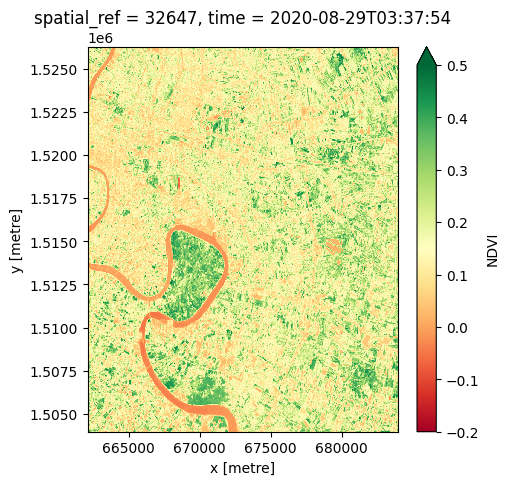

In [43]:
# select NDVI index
ds_time.NDVI.plot(vmin=-0.2, vmax=0.5, cmap = 'RdYlGn', figsize=(5, 5))

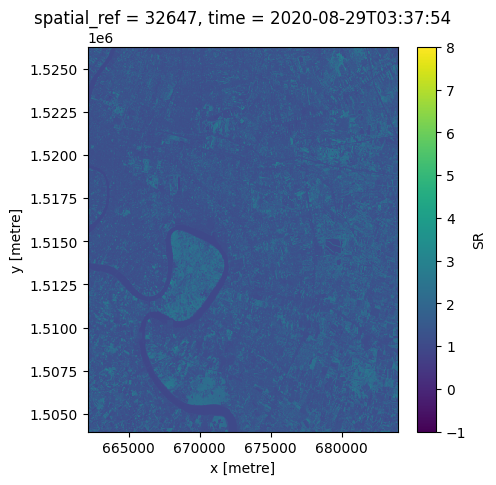

In [44]:
# select SR index
ds_time.SR.plot(vmin=-1, vmax=8, cmap = 'viridis', figsize=(5, 5))

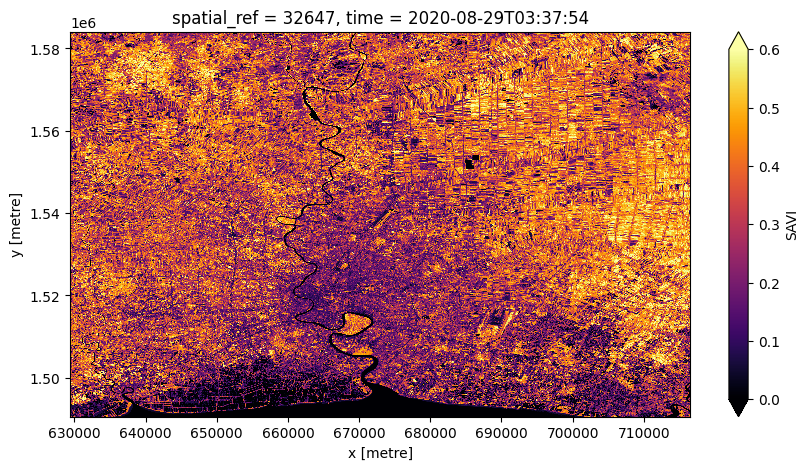

In [15]:
# select SAVI index
ds_time.SAVI.plot(vmin=0, vmax=0.6, cmap='inferno', figsize=(10, 5))